# Flight Booking Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Flight_Booking.csv to Flight_Booking.csv


In [8]:
import pandas as pd
df = pd.read_csv("Flight_Booking.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
# Checking out the missing values in a dataframe
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


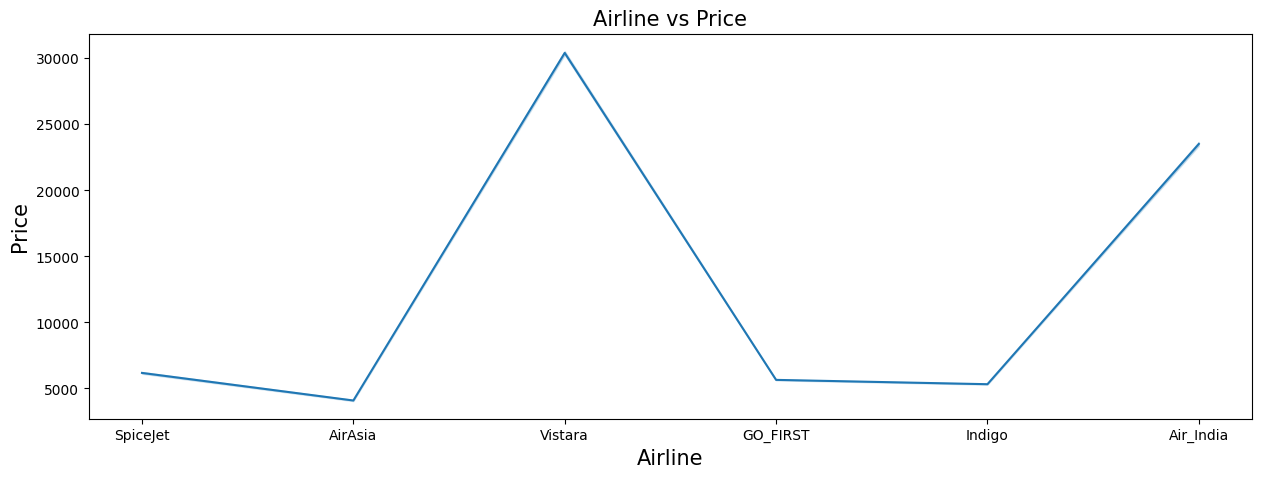

In [11]:
# Data Visualization
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y = df['price'])
plt.title('Airline vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

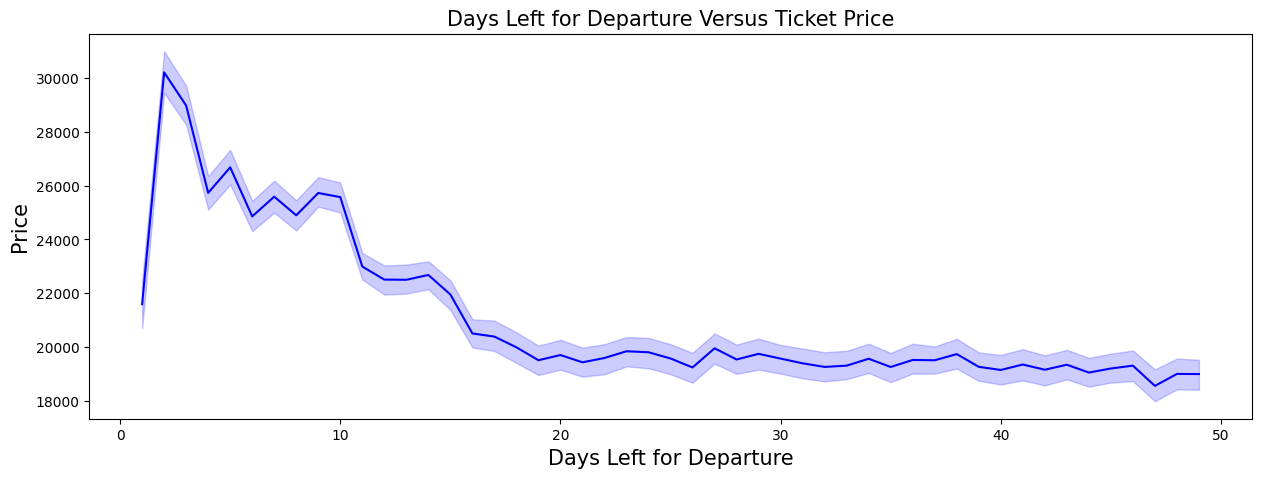

In [12]:
# Data Visualization
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='days_left', y ='price', color='blue')
plt.title('Days Left for Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

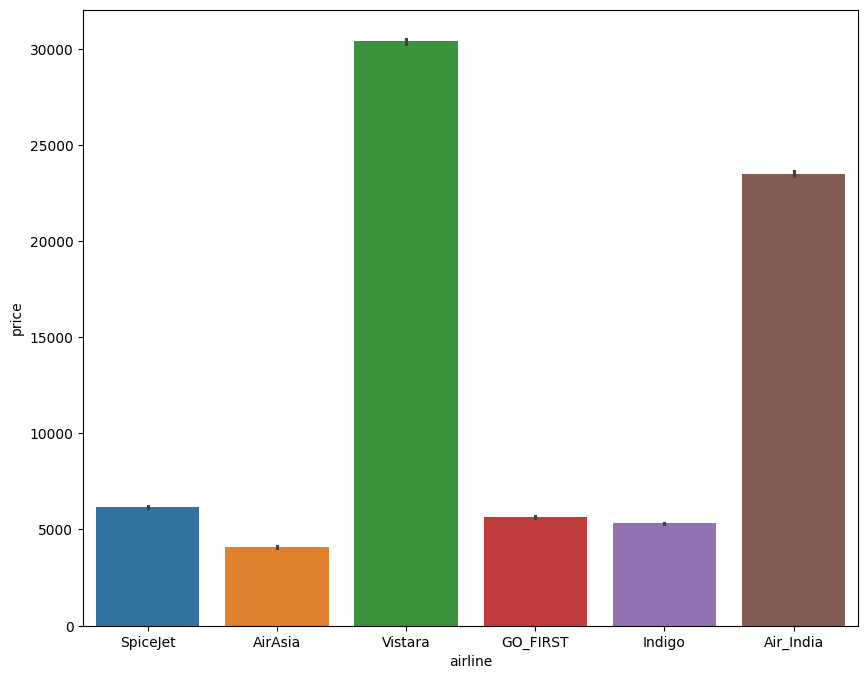

In [15]:
# Data Visualization (Price range of all the flights)
plt.figure(figsize=(10,8))
sns.barplot(x=df['airline'], y = df['price'], hue=df['airline'])

<Axes: xlabel='class', ylabel='price'>

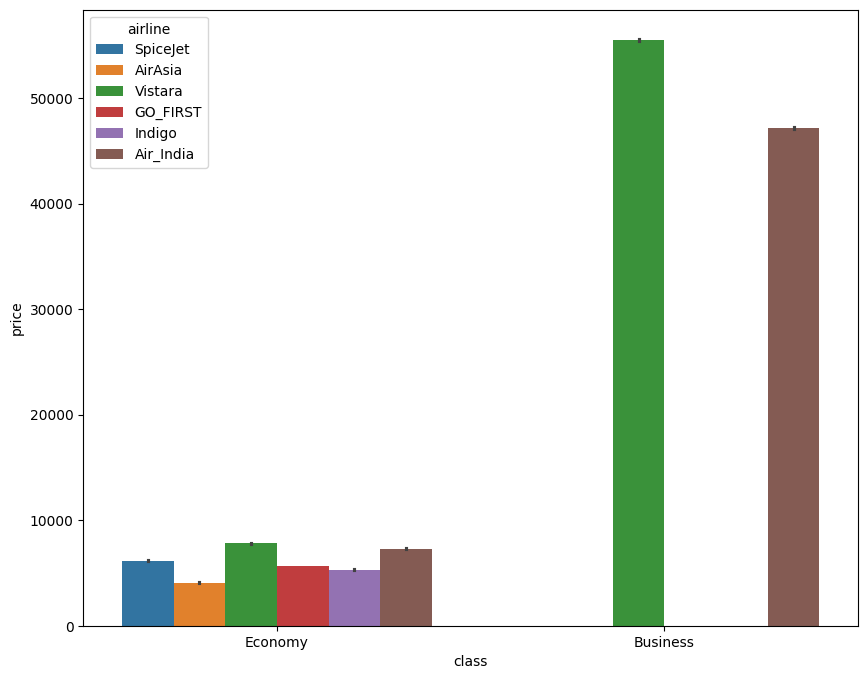

In [16]:
# Data Visualization (Range of price of all the flights of Economy and Business Class)
plt.figure(figsize=(10,8))
sns.barplot(x=df['class'], y = df['price'], hue=df['airline'])

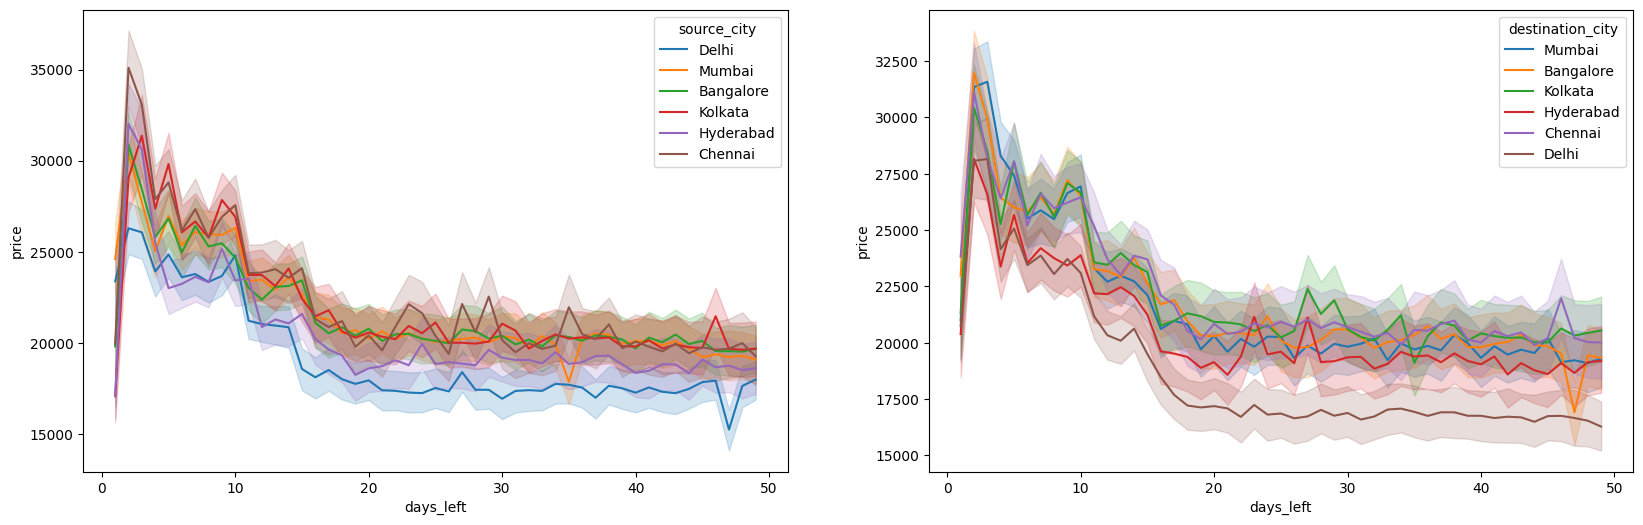

In [17]:
# DAta Visualization
# Range of price of flights with source and destination city according to the days left
fig,ax=plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x='days_left', y='price', data=df, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price', data=df, hue='destination_city', ax=ax[1])
plt.show()

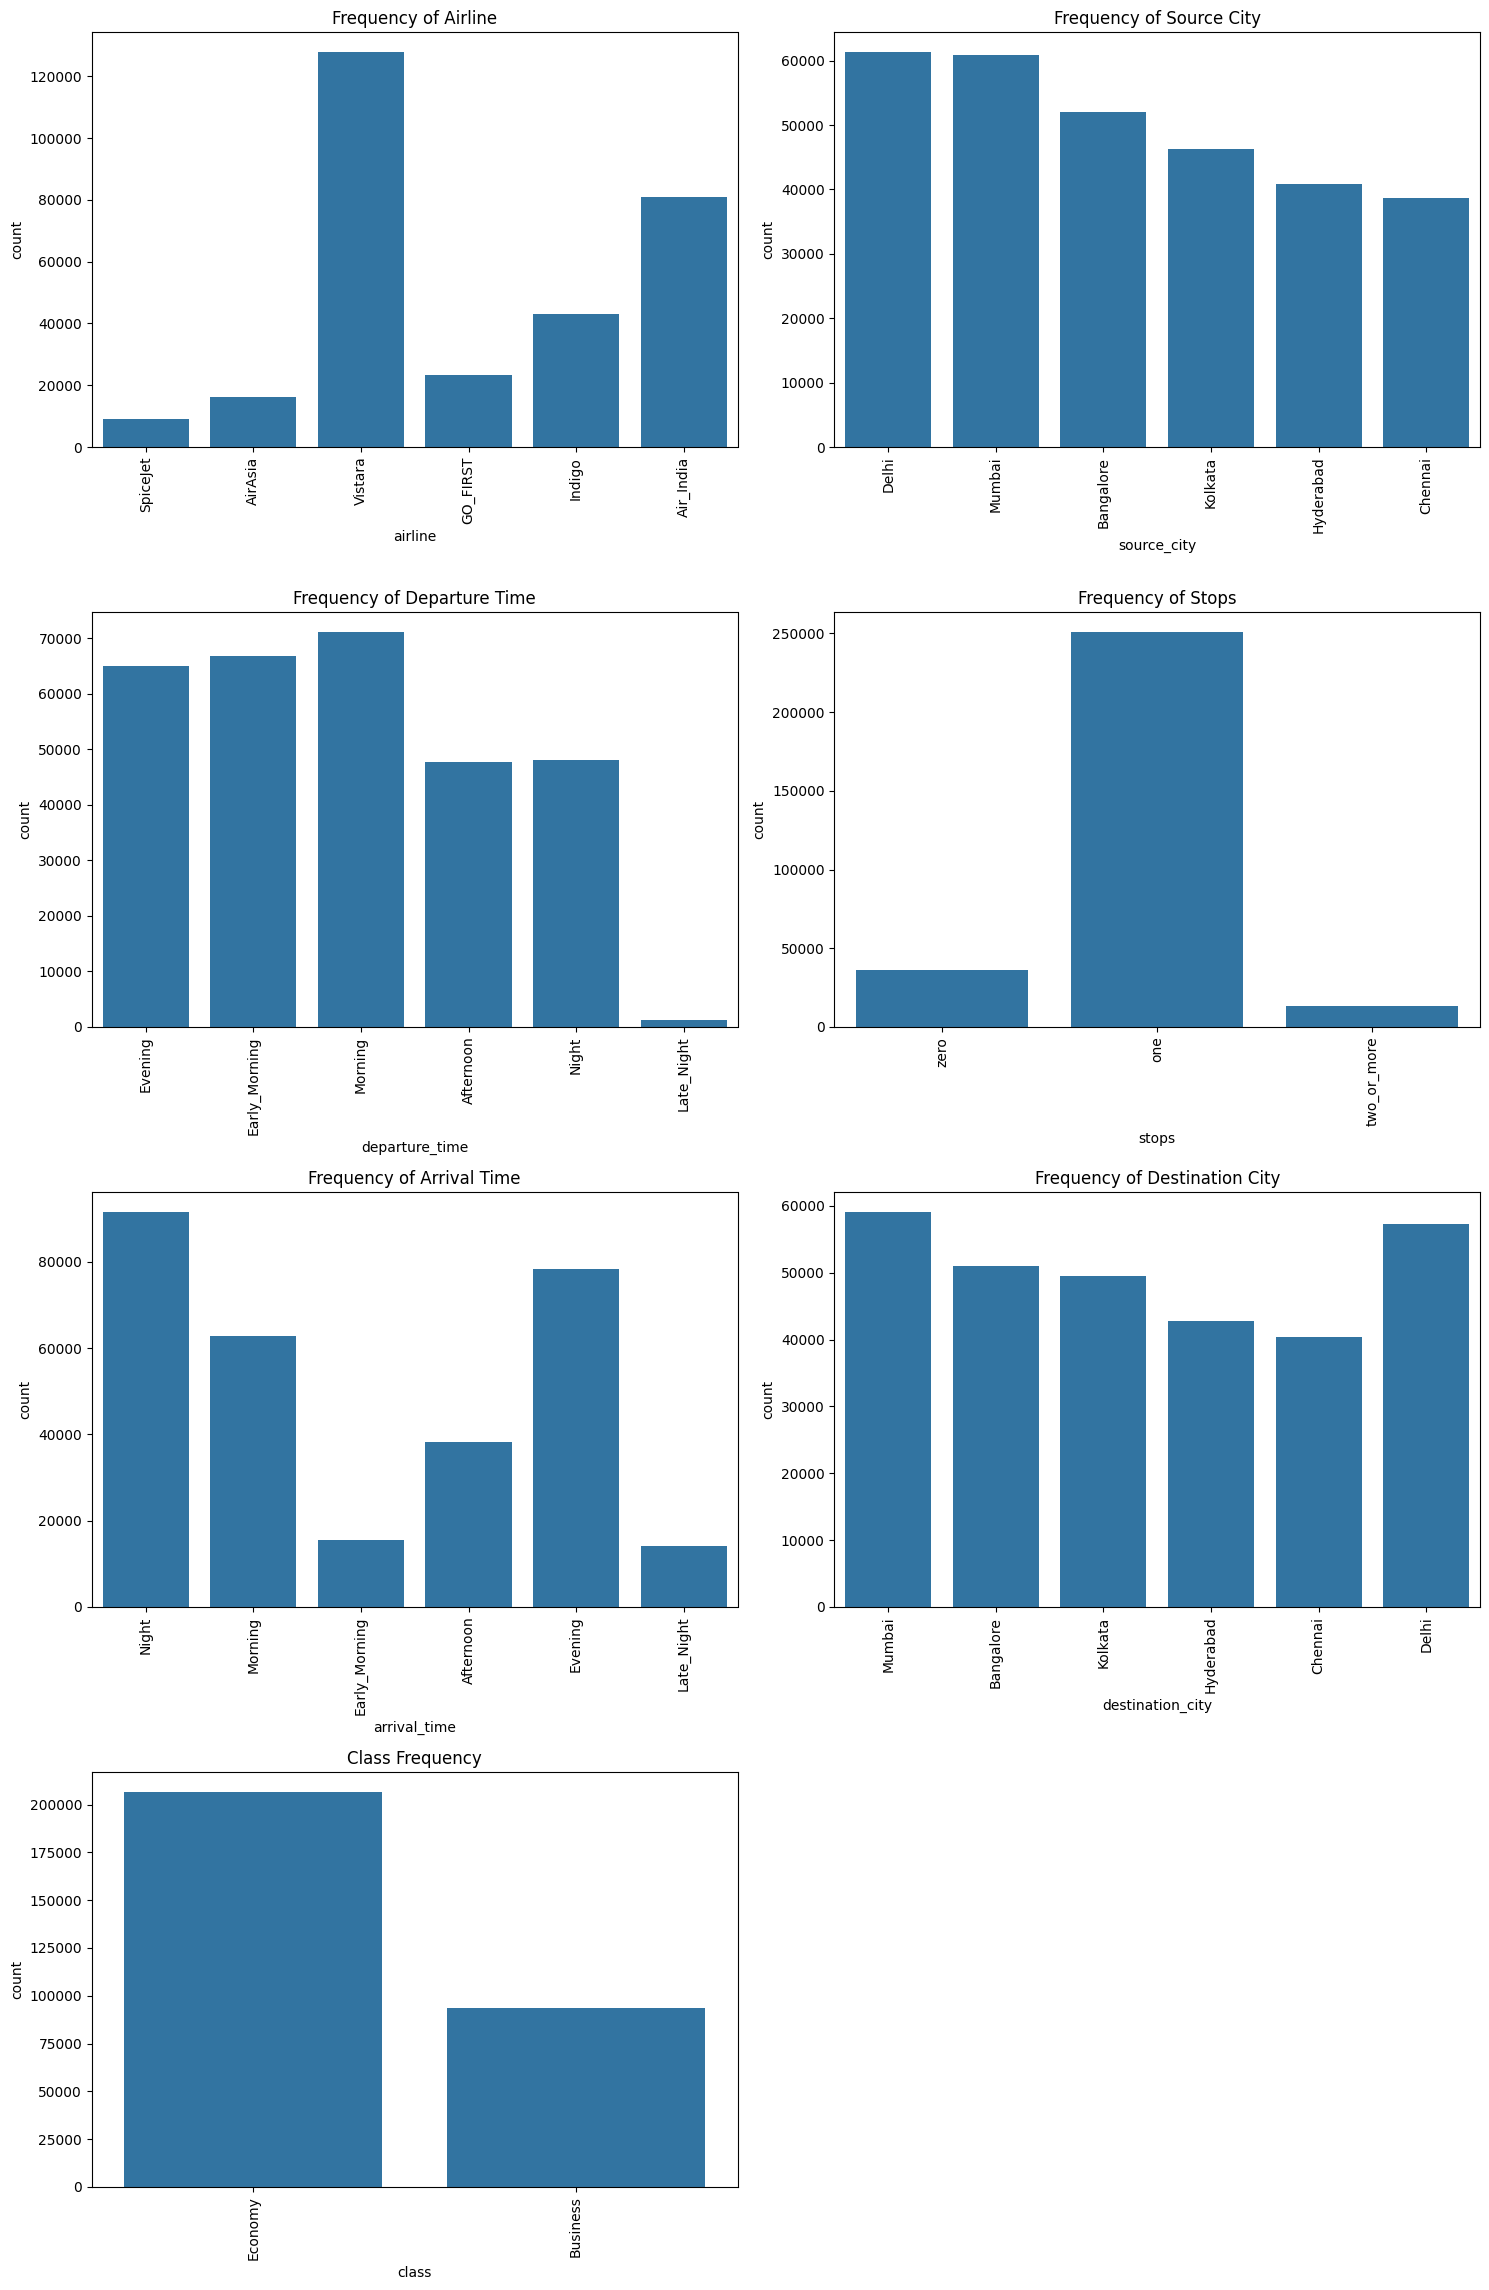

In [18]:
plt.figure(figsize=(15, 23))

plt.subplot(4, 2, 1)
sns.countplot(x=df["airline"], data=df)
plt.title("Frequency of Airline")
plt.xticks(rotation=90)

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")
plt.xticks(rotation=90)

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")
plt.xticks(rotation=90)

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")
plt.xticks(rotation=90)

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")
plt.xticks(rotation=90)

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")
plt.xticks(rotation=90)

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [19]:
# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["airline"] = le.fit_transform(df["airline"])
df["source_city"] = le.fit_transform(df["source_city"])
df["departure_time"] = le.fit_transform(df["departure_time"])
df["stops"] = le.fit_transform(df["stops"])
df["arrival_time"] = le.fit_transform(df["arrival_time"])
df["destination_city"] = le.fit_transform(df["destination_city"])
df["class"] = le.fit_transform(df["class"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [21]:
# Feature Selection

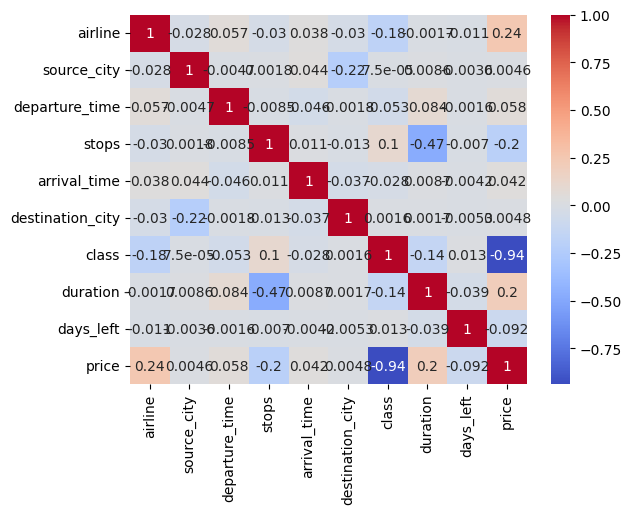

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [26]:
# Feature Selection

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Collect all numeric columns except 'price'
col_list = []
for col in df.columns:
    if (df[col].dtype != 'object') and (col != 'price'):
        col_list.append(col)

# Create DataFrame for VIF calculation
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF data
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [28]:
# Feature Selection

In [29]:
# Drop the 'stops' column as per VIF recommendation
df = df.drop(columns=["stops"])

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Collect all numeric columns except 'price'
col_list = []
for col in df.columns:
    if (df[col].dtype != 'object') and (col != 'price'):
        col_list.append(col)

# Create DataFrame for VIF calculation
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF results
print(vif_data)


            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [30]:
# Linear Regression

In [33]:
# Splitting data into features and target
X = df.drop(columns=["price"])
y = df["price"]

X = X.select_dtypes(include=[np.number])  # Keep only numeric columns
X = X.dropna()  # Optional: make sure there are no NaNs


# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predicting
y_pred = lr.predict(x_test)

# Comparing actual vs predicted values
import numpy as np
import pandas as pd
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
difference


,Actual_Value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [34]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))

from sklearn import metrics

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

root_mean_sq_error = np.sqrt(mean_sq_error)
print("Root Mean Squared Error:", root_mean_sq_error)


R2 Score: 0.897752737512321
Mean Absolute Error: 4468.426673542113
Mean Absolute Percentage Error: 0.34765804610681816
Mean Squared Error: 52706651.33334208
Root Mean Squared Error: 7259.934664536733


/tmp/ipython-input-35-1180755147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
/tmp/ipython-input-35-1180755147.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predicted")


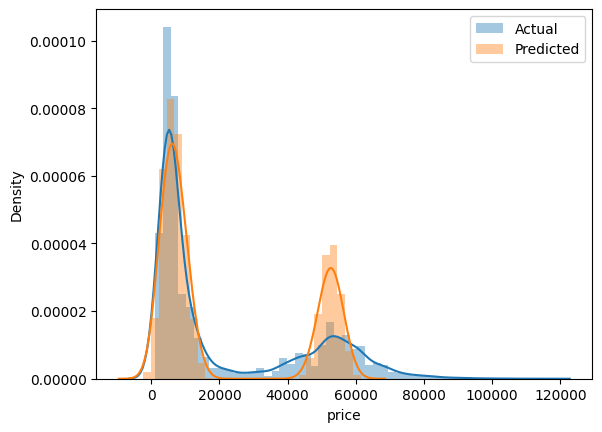

In [35]:
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()
plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn import metrics
import numpy as np

# Initialize and train the model
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# Make predictions
y_pred = dt.predict(x_test)

# Evaluation metrics
print("R2 Score:", r2_score(y_test, y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

root_mean_sq_error = np.sqrt(mean_sq_error)
print("Root Mean Squared Error:", root_mean_sq_error)


R2 Score: 0.9746657616553914
Mean Absolute Error: 1218.9563308957038
Mean Absolute Percentage Error: 0.07736713512633146
Mean Squared Error: 13059350.78101453
Root Mean Squared Error: 3613.772375373763


R2 Score: 0.9844986000593438
Mean Absolute Error: 1124.1743625319618
Mean Absolute Percentage Error: 0.07340444178145268
Mean Squared Error: 7990696.88490985
Root Mean Squared Error: 2826.7820724119942


/tmp/ipython-input-37-1244462052.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual", hist=False)
/tmp/ipython-input-37-1244462052.py:32: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predicted", hist=False)


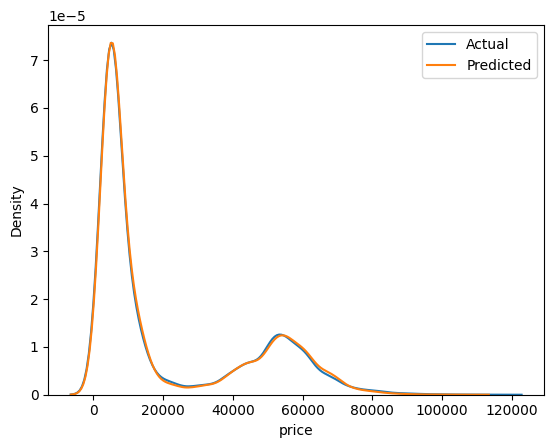

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

# Make predictions
y_pred = rfr.predict(x_test)

# Evaluation metrics
print("R2 Score:", r2_score(y_test, y_pred))

mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

root_mean_sq_error = np.sqrt(mean_sq_error)
print("Root Mean Squared Error:", root_mean_sq_error)

# Distribution plot of actual vs predicted
sns.distplot(y_test, label="Actual", hist=False)
sns.distplot(y_pred, label="Predicted", hist=False)
plt.legend()
plt.show()
